## Final Project Submission

Please fill out:
* Student name: Huseyin Caglar
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Import Neccesary Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
cd data


C:\Users\AI\Desktop\Flatiron\Phase_2\dsc-phase-2-project\data


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A0B5-0BC1

 Directory of C:\Users\AI\Desktop\Flatiron\Phase_2\dsc-phase-2-project\data

09/26/2021  03:32 PM    <DIR>          .
09/26/2021  03:32 PM    <DIR>          ..
09/16/2021  04:04 PM             1,120 column_names.md
09/16/2021  04:04 PM         2,475,934 kc_house_data.csv
               2 File(s)      2,477,054 bytes
               2 Dir(s)  378,669,268,992 bytes free


In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.shape

(21597, 21)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning

In [7]:
#Looking for missing values.
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#Filling missing values.
df['yr_renovated']= df['yr_renovated'].fillna(0)
df['view'] = df['view'].fillna(0.0)
df['waterfront'] = df['waterfront'].fillna(0.0)

In [9]:
#Dropping not usual columns.
df.drop(columns=['id','date','zipcode','lat','long'],inplace=True)

In [10]:
#Cleaning sqft_basement column.
df.sqft_basement = df.sqft_basement.replace('?',0.0)

In [11]:
df.sqft_basement = df.sqft_basement.astype(float)

<AxesSubplot:>

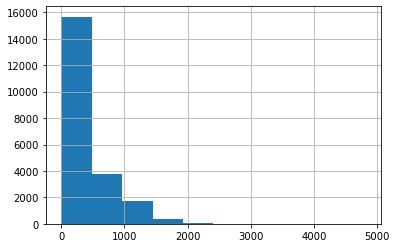

In [12]:
df.sqft_basement.hist()

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503


In [14]:
#Creating function to fix scientific notations.
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e10:
        s = '${:1.1f}B'.format(x*1e-10)
    elif x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-2)
    return s

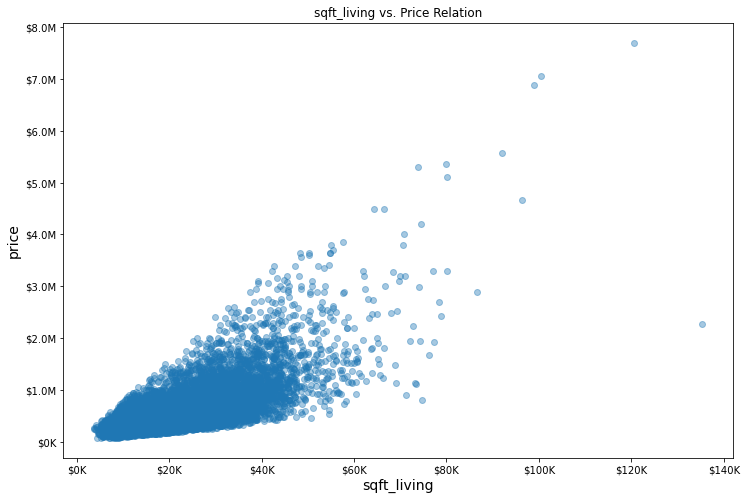

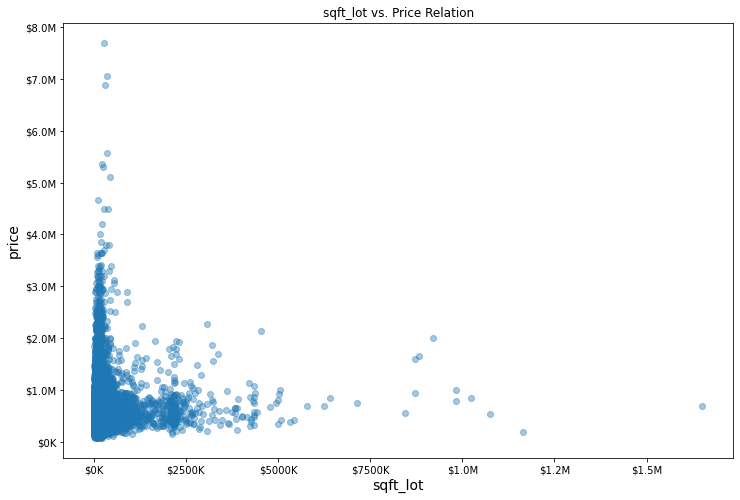

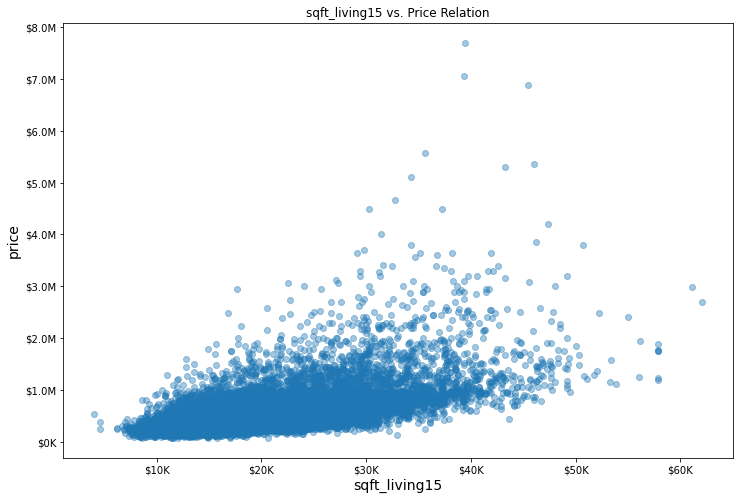

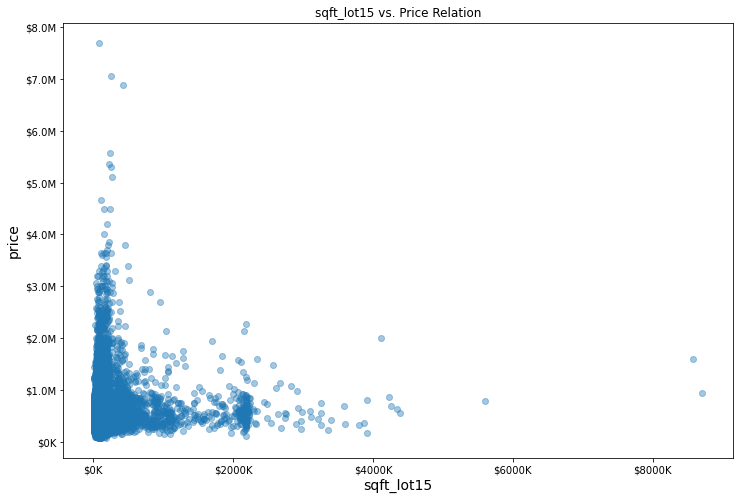

In [15]:
for column in ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']:
    fig , ax = plt.subplots(figsize=(12,8))
    ax.scatter(df[column], df.price ,alpha=.4)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('price',fontsize=14)
    ax.set_title(f'{column} vs. Price Relation')
    ax.yaxis.set_major_formatter(currency)
    ax.xaxis.set_major_formatter(currency)
    plt.show()

In [16]:
# Turning sqft_basement column to binary.
df.sqft_basement[df.sqft_basement!=0]=1

<ipython-input-16-543a2f2e22e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sqft_basement[df.sqft_basement!=0]=1


## Checking For Multicollinearity

In [17]:
x = df.drop('price',axis=1)

In [18]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif["features"] = x.columns

print(vif)

    VIF Factor       features
0    23.278227       bedrooms
1    25.361054      bathrooms
2    99.157874    sqft_living
3     2.362706       sqft_lot
4    16.477404         floors
5     1.185197     waterfront
6     1.483257           view
7    30.190016      condition
8   141.995085          grade
9    89.100513     sqft_above
10    5.155684  sqft_basement
11  128.138178       yr_built
12    1.053819   yr_renovated
13   26.433164  sqft_living15
14    2.574779     sqft_lot15


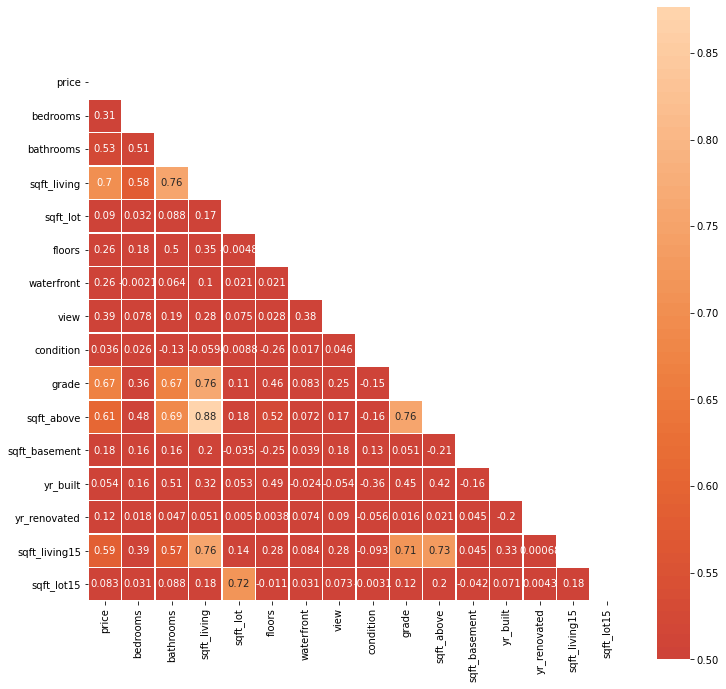

In [19]:
plt.figure(figsize=(12,12))
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask ,annot=True, center=0, vmin=.5, square=True, linewidth=.5)
plt.show()

In [20]:
#Dropping most multicollinearity columns.
df.drop(columns=['sqft_above','grade','bathrooms'],inplace=True)

In [21]:
#Binning yr_built.
df.yr_built.describe()

built_bins=[1900,1930,1960,1990,2020]
labels=['1900_1930', '1930_1960','1960_1990','1990_2020']
bins_built= pd.cut(df['yr_built'], built_bins , labels=labels )
bins_built = bins_built.cat.as_unordered()
df.yr_built=bins_built


In [26]:
#Cleaning columns for one hot coding.
df=df.round({'floors': 0})
df.floors=df.floors.astype(int)
df.waterfront=df.waterfront.astype(int)
df.view=df.view.astype(int)

cat_list=['yr_built','condition','waterfront','floors','view', 'bedrooms','sqft_basement']

In [27]:
df_cat=pd.DataFrame()
for i in cat_list:
    df_cat[i]=df[i].astype('category')

In [28]:
for i in cat_list:
    dummies=pd.get_dummies(df_cat[i],prefix=i, drop_first=True)
    df_cat=df_cat.join(dummies)
    df_cat.drop([i], axis=1, inplace=True)

In [29]:
df_cat.head()

,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,waterfront_1,floors_2,floors_3,...,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1.0
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardization

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

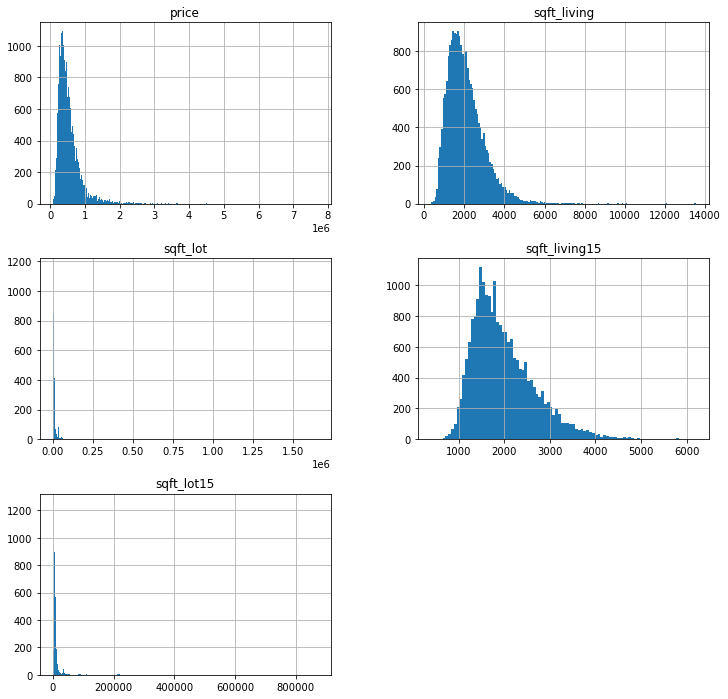

In [33]:
df_cont.hist(bins='auto',figsize=(12,12))

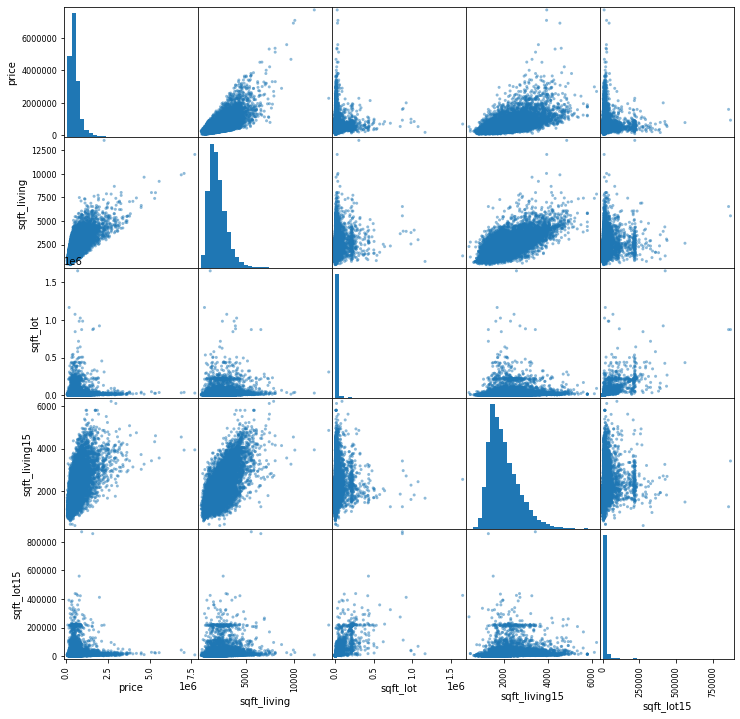

In [34]:
#Looking for each feature relation with each other.
df_cont=df.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
pd.plotting.scatter_matrix(df_cont,hist_kwds={'bins':30},figsize=(12,12))
plt.show()

In [35]:
#Using quantile transformation to fix skewness and scaling them.
standart = quantile_transform(df_cont[['sqft_living',
                                        'sqft_lot',
                                        'sqft_living15',
                                        'sqft_lot15']],
                               output_distribution = 'normal'
                                )
cont_std = pd.DataFrame(standart)
cont_std.columns=['sqft_living','sqft_lot','sqft_living15','sqft_lot15']

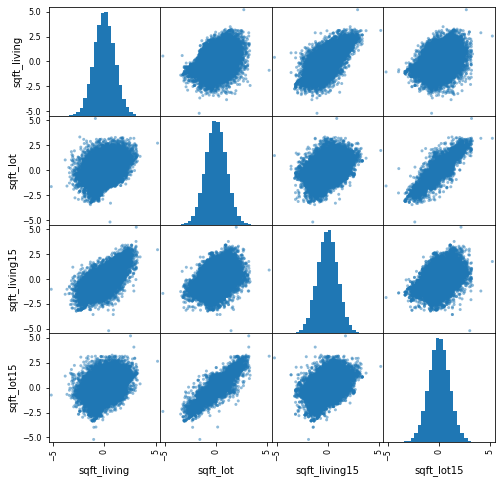

In [36]:
pd.plotting.scatter_matrix(cont_std,hist_kwds={'bins':30},figsize=(8,8))
plt.show()

In [37]:
# Features now normally distributed.

In [46]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results


In [45]:
#Creating function to visualize homoscedasticity.
def visualize_homoscedasticity(model,features, label):
    df_results = calculate_residuals(model, features, label)
    
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

In [47]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [48]:
lin.score(X_train,y_train)

0.5177498055744425

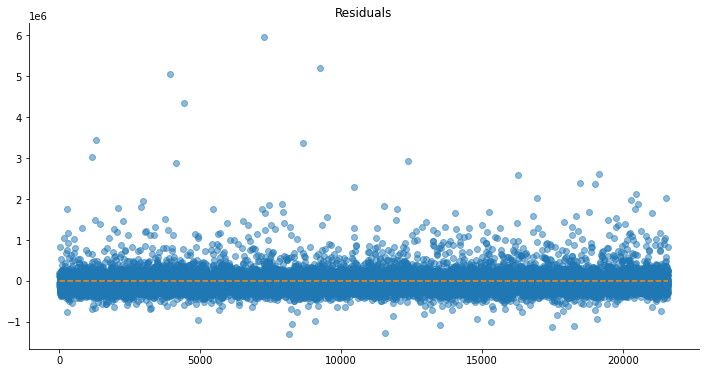

In [51]:
#Looking for train data homoscedasticity.
visualize_homoscedasticity(lin, X_train, y_train)

## Modeling

In [38]:
df_final=pd.concat([cont_std, df_cat ,df.price], axis=1)

In [39]:
#Looking final missing values before modeling.
df_final.isna().sum()

sqft_living           0
sqft_lot              0
sqft_living15         0
sqft_lot15            0
yr_built_1930_1960    0
yr_built_1960_1990    0
yr_built_1990_2020    0
condition_2           0
condition_3           0
condition_4           0
condition_5           0
waterfront_1          0
floors_2              0
floors_3              0
floors_4              0
view_1                0
view_2                0
view_3                0
view_4                0
bedrooms_2            0
bedrooms_3            0
bedrooms_4            0
bedrooms_5            0
bedrooms_6            0
bedrooms_7            0
bedrooms_8            0
bedrooms_9            0
bedrooms_10           0
bedrooms_11           0
bedrooms_33           0
sqft_basement_1.0     0
price                 0
dtype: int64

## Train Test Split

In [40]:
y = df_final['price']
X= df_final.drop('price',axis=1)

In [41]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 200)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((16197, 31), (5400, 31), (16197,), (5400,))

In [42]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              2866.
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:17:45   Log-Likelihood:                     -2.2468e+05
No. Observations:               16197   AIC:                                  4.494e+05
Df Residuals:                   16166   BIC:                                  4.497e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living         1.941e+05   4156.881     46.689      0.000    1.86e+05    2.02e+05
sqft_lot           -1.189e+04   5447.142     -2.183      0.029   -2.26e+04   -1216.538
sqft_living15       7.906e+04   3232.187     24.461      0.000    7.27e+04    8.54e+04
sqft_lot15         -7700.0396   5379.862     -1.431      0.152   -1.82e+04    2845.086
yr_built_1930_1960 -7.218e+04   7690.198     -9.386      0.000   -8.73e+04   -5.71e+04
yr_built_1960_1990 -1.783e+05   7635.611    -23.347      0.000   -1.93e+05   -1.63e+05
yr_built_1990_2020 -1.868e+05   7933.696    -23.544      0.000   -2.02e+05   -1.71e+05
condition_2         6.806e+05   3.08e+04     22.102      0.000     6.2e+05    7.41e+05
condition_3         7.081e+05   2.16e+04     32.709      0.000    6.66e+05    7.51e+05
condition_4         7.225e+05   2.18e+04     33.203      0.000     6.8e+05    7.65e+05
condition_5         7.617e+05   2.25e+04     33.859      0.000    7.18e+05    8.06e+05
waterfront_1         5.52e+05   2.96e+04     18.663      0.000    4.94e+05     6.1e+05
floors_2            2.656e+04   5844.280      4.545      0.000    1.51e+04     3.8e+04
floors_3            1.802e+05   1.42e+04     12.695      0.000    1.52e+05    2.08e+05
floors_4            1.641e+05   1.15e+05      1.428      0.153   -6.12e+04    3.89e+05
view_1               1.58e+05   1.65e+04      9.599      0.000    1.26e+05     1.9e+05
view_2              1.002e+05   9954.529     10.066      0.000    8.07e+04     1.2e+05
view_3              1.996e+05   1.37e+04     14.583      0.000    1.73e+05    2.26e+05
view_4              3.633e+05   2.06e+04     17.636      0.000    3.23e+05    4.04e+05
bedrooms_2          2.164e+04   2.09e+04      1.035      0.301   -1.94e+04    6.26e+04
bedrooms_3         -8.437e+04   2.09e+04     -4.046      0.000   -1.25e+05   -4.35e+04
bedrooms_4         -1.181e+05   2.15e+04     -5.504      0.000    -1.6e+05   -7.61e+04
bedrooms_5         -8.359e+04   2.28e+04     -3.671      0.000   -1.28e+05    -3.9e+04
bedrooms_6          -3.75e+04   2.88e+04     -1.304      0.192   -9.39e+04    1.89e+04
bedrooms_7         -9.805e+04   5.34e+04     -1.836      0.066   -2.03e+05    6652.955
bedrooms_8         -7.512e+04   8.41e+04     -0.894      0.372    -2.4e+05    8.97e+04
bedrooms_9         -1.861e+05    1.5e+05     -1.242      0.214    -4.8e+05    1.07e+05
bedrooms_10        -1.997e+05    1.5e+05     -1.335      0.182   -4.93e+05    9.36e+04
bedrooms_11        -3.707e+05   2.57e+05     -1.441      0.150   -8.75e+05    1.34e+05
bedrooms_33         9.552e+04   2.57e+05      0.371      0.710   -4.09e+05       6e+05
sqft_basement_1.0    720.6053   5074.422      0.142      0.887   -9225.824    1.07e+04
==========================

In [43]:
#Removing features with a pvalue < 0.05.
columns = model.pvalues[model.pvalues <= 0.05]
columns.index
model = sm.OLS(y_train, X_train[columns.index]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              4437.
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:17:45   Log-Likelihood:                     -2.2469e+05
No. Observations:               16197   AIC:                                  4.494e+05
Df Residuals:                   16177   BIC:                                  4.496e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living         1.902e+05   3605.769     52.754      0.000    1.83e+05    1.97e+05
sqft_lot           -1.885e+04   2638.495     -7.144      0.000    -2.4e+04   -1.37e+04
sqft_living15       7.944e+04   3175.713     25.015      0.000    7.32e+04    8.57e+04
yr_built_1930_1960 -7.273e+04   7634.977     -9.526      0.000   -8.77e+04   -5.78e+04
yr_built_1960_1990 -1.799e+05   7546.354    -23.841      0.000   -1.95e+05   -1.65e+05
yr_built_1990_2020 -1.851e+05   7790.451    -23.762      0.000      -2e+05    -1.7e+05
condition_2         6.918e+05   2.36e+04     29.372      0.000    6.46e+05    7.38e+05
condition_3          7.19e+05   8876.465     81.002      0.000    7.02e+05    7.36e+05
condition_4         7.332e+05   8986.730     81.589      0.000    7.16e+05    7.51e+05
condition_5          7.73e+05   1.05e+04     73.418      0.000    7.52e+05    7.94e+05
waterfront_1        5.534e+05   2.96e+04     18.726      0.000    4.95e+05    6.11e+05
floors_2            2.577e+04   5401.318      4.771      0.000    1.52e+04    3.64e+04
floors_3            1.794e+05   1.39e+04     12.918      0.000    1.52e+05    2.07e+05
view_1              1.591e+05   1.64e+04      9.691      0.000    1.27e+05    1.91e+05
view_2              1.011e+05   9926.868     10.186      0.000    8.17e+04    1.21e+05
view_3              2.012e+05   1.37e+04     14.738      0.000    1.74e+05    2.28e+05
view_4               3.64e+05   2.06e+04     17.683      0.000    3.24e+05    4.04e+05
bedrooms_3          -9.53e+04   6369.181    -14.963      0.000   -1.08e+05   -8.28e+04
bedrooms_4         -1.263e+05   7497.402    -16.845      0.000   -1.41e+05   -1.12e+05
bedrooms_5         -9.014e+04   1.03e+04     -8.720      0.000    -1.1e+05   -6.99e+04
==============================================================================
Omnibus:                    15640.414   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2352228.145
Skew:                           4.285   Prob(JB):                         0.00
Kurtosis:                      61.412   Cond. No.                         23.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

 This model %84 percent predict house price.

 Findings ;
 1. Living size(Square feet)
 2. Waterfront effects a lot.
 3. Condition is one of most importants.
 4. Views effects a lot also.

## Future Work

 For future work for this model could be work on location with lat long or zipcode. 